In [20]:
import pandas as pd
import matplotlib 
import shapely
import json
import numpy as np
import numpy as np  # Numerical operations
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting and visualization
import geopandas as gpd #for coordinates
import mapclassify
from IPython.display import display, HTML  # Displaying HTML output in Jupyter notebooks
import warnings  # Suppress warnings
from colorama import Fore, Style  # Colored terminal text
import plotly.express as px


In [21]:
df = pd.read_csv(r"C:\Users\Varnosafety INT\Downloads\fashionista data.csv")

In [22]:
df.head(10)

,user_id,event_name,event_date,event_timestamp,session_length_minutes,purchase_value,ad_ilrd,user_age_days,is_premium_user,total_sessions,total_purchases,total_spent,days_since_last_session,retained_7_days,retained_30_days
0,user_0001,advert_completed,20250225,1740441600,33,0.000000,0.132540,103,False,23,2,$13.89,68,False,False
1,user_0001,purchase_made,20241120,1732060800,20,0.000000,0.000000,103,False,23,2,$13.89,29,False,True
2,user_0001,purchase_made,20240601,1717200000,16,57.623319,0.000000,103,False,23,2,$13.89,70,False,False
3,user_0001,app_remove,20241105,1730764800,55,0.000000,0.000000,103,False,23,2,$13.89,61,False,False
4,user_0001,advert_completed,20250401,1743465600,7,0.000000,0.142409,103,False,23,2,$13.89,63,False,False
5,user_0001,app_remove,20240616,1718496000,1,0.000000,0.000000,103,False,23,2,$13.89,45,False,False
6,user_0001,session_start,20240909,1725840000,6,0.000000,0.000000,103,False,23,2,$13.89,54,False,False
7,user_0001,session_start,20241202,1733097600,48,0.000000,0.000000,103,False,23,2,$13.89,60,False,False
8,user_0001,session_start,20241015,1728950400,57,0.000000,0.000000,103,False,23,2,$13.89,1,True,True
9,user_0001,session_start,20250206,1738800000,22,0.000000,0.000000,103,False,23,2,$13.89,63,False,False


In [23]:
#looking through the data i have to convert the date and the event time stamp to a standard
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

# print to verify
df.head(5)


,user_id,event_name,event_date,event_timestamp,session_length_minutes,purchase_value,ad_ilrd,user_age_days,is_premium_user,total_sessions,total_purchases,total_spent,days_since_last_session,retained_7_days,retained_30_days
0,user_0001,advert_completed,2025-02-25,1740441600,33,0.000000,0.132540,103,False,23,2,$13.89,68,False,False
1,user_0001,purchase_made,2024-11-20,1732060800,20,0.000000,0.000000,103,False,23,2,$13.89,29,False,True
2,user_0001,purchase_made,2024-06-01,1717200000,16,57.623319,0.000000,103,False,23,2,$13.89,70,False,False
3,user_0001,app_remove,2024-11-05,1730764800,55,0.000000,0.000000,103,False,23,2,$13.89,61,False,False
4,user_0001,advert_completed,2025-04-01,1743465600,7,0.000000,0.142409,103,False,23,2,$13.89,63,False,False


In [24]:
# Convert 'event_timestamp' from Unix time to datetime
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')

# print first few rows to verify
df.head(5)


,user_id,event_name,event_date,event_timestamp,session_length_minutes,purchase_value,ad_ilrd,user_age_days,is_premium_user,total_sessions,total_purchases,total_spent,days_since_last_session,retained_7_days,retained_30_days
0,user_0001,advert_completed,2025-02-25,2025-02-25,33,0.000000,0.132540,103,False,23,2,$13.89,68,False,False
1,user_0001,purchase_made,2024-11-20,2024-11-20,20,0.000000,0.000000,103,False,23,2,$13.89,29,False,True
2,user_0001,purchase_made,2024-06-01,2024-06-01,16,57.623319,0.000000,103,False,23,2,$13.89,70,False,False
3,user_0001,app_remove,2024-11-05,2024-11-05,55,0.000000,0.000000,103,False,23,2,$13.89,61,False,False
4,user_0001,advert_completed,2025-04-01,2025-04-01,7,0.000000,0.142409,103,False,23,2,$13.89,63,False,False


In [25]:
# we are looking to get the retention metric CHURN_RATE & RETURN_RATE of the game
# CHURN_RATE based on retention 
churn_7d = 1 - df['retained_7_days'].mean()
print(f"7-day churn rate: {churn_7d * 100:.2f}%")

7-day churn rate: 90.73%


In [26]:
churn_30d = 1 - df['retained_30_days'].mean()
print(f"30-day churn rate: {churn_30d * 100:.2f}%")

30-day churn rate: 64.90%


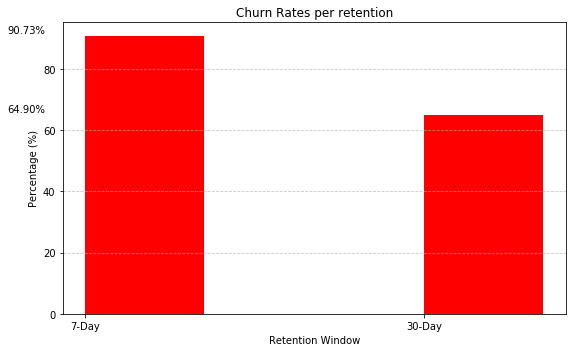

In [27]:

retention_7d = df['retained_7_days'].mean()
churn_7d = 1 - retention_7d

retention_30d = df['retained_30_days'].mean()
churn_30d = 1 - retention_30d

# Data to plot
labels = ['7-Day', '30-Day']

churn_rates = [churn_7d * 100, churn_30d * 100]

# Create bar chart
x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar([i + width for i in x], churn_rates, width=width, label='Churn', color='red')

# Labels and formatting
plt.xlabel('Retention Window')
plt.ylabel('Percentage (%)')
plt.title('Churn Rates per retention')
plt.xticks([i + width / 2 for i in x], labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show percentage on bar
plt.text(0, churn_7d * 100 + 1, f"{churn_7d * 100:.2f}%", ha='center')
plt.text(0, churn_30d * 100 + 1, f"{churn_30d * 100:.2f}%", ha='center')


# Show plot
plt.tight_layout()
plt.show()


In [28]:

# Making sure event_date is in datetime format
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

#  user and event date
df = df.sort_values(by=['user_id', 'event_date'])

# churned users (those with days_since_last_session > 30)
df['churned'] = df['days_since_last_session'] > 30

# Find users who ever churned & Check if those users returned
churned_users = df[df['churned']]['user_id'].unique()

returned_after_churn = df[(df['user_id'].isin(churned_users)) & (df['churned'] == False)]
returned_users = returned_after_churn['user_id'].unique()
# return rate after churn
return_rate_after_churn = len(returned_users) / len(churned_users) * 100

print(f"Return rate after churn: {return_rate_after_churn:.2f}%")


Return rate after churn: 100.00%


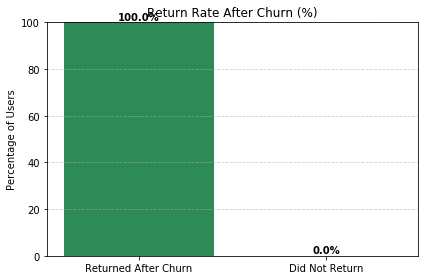

In [39]:
import matplotlib.pyplot as plt

# Assuming this is already calculated
return_rate_after_churn =100.00  
no_return_rate = 100 - return_rate_after_churn

# Data
labels = ['Returned After Churn', 'Did Not Return']
values = [return_rate_after_churn, no_return_rate]
colors = ['seagreen', 'lightpink']

# Plot
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=colors)

# Add titles and labels
plt.title('Return Rate After Churn (%)')
plt.ylabel('Percentage of Users')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show percentages on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [30]:
#lets check for the conversion rate using the toal purchases column
# Users who made at least one purchase
converters = df[df['total_purchases'] > 0]['user_id'].nunique()

# Total users
total_users = df['user_id'].nunique()

# Conversion rate
conversion_rate = (converters / total_users) * 100

print(f"Conversion rate: {conversion_rate:.2f}%")


Conversion rate: 93.80%


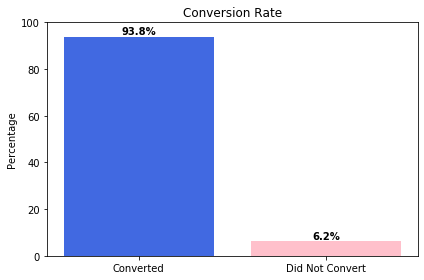

In [31]:

non_converters = total_users - converters

labels = ['Converted', 'Did Not Convert']
values = [conversion_rate, 100 - conversion_rate]
colors = ['royalblue', 'pink']

plt.bar(labels, values, color=colors)
plt.title('Conversion Rate')
plt.ylabel('Percentage')
plt.ylim(0, 100)

for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [32]:
#  only purchase events
purchases = df[df['event_name'] == 'purchase']




In [33]:
# Average value per purchase
avg_purchase_value = purchases['purchase_value'].mean()
print(f"Average purchase value: {avg_purchase_value:.2f}")


Average purchase value: nan


In [34]:
# Make sure event_date is in datetime format
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

# MARCH
start_date = pd.to_datetime('2025-03-01')
end_date = pd.to_datetime('2025-04-01')

#  filter
new_users_df = df[(df['event_name'] == 'purchase_made') & 
                  (df['event_date'] >= start_date) & 
                  (df['event_date'] <= end_date)]

# unique new users
new_users_count = new_users_df['user_id'].nunique()

# marketing spend
marketing_spend = 3000

# UAC
uac = marketing_spend / new_users_count
print(f"User Acquisition Cost: ${uac:.2f}")


User Acquisition Cost: $18.52


In [35]:
# Make sure event_date is in datetime format
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

#FEBUARY
start_date = pd.to_datetime('2025-02-01')
end_date = pd.to_datetime('2025-03-01')

#  filter
new_users_df = df[(df['event_name'] == 'purchase_made') & 
                  (df['event_date'] >= start_date) & 
                  (df['event_date'] <= end_date)]

# unique new users
new_users_count = new_users_df['user_id'].nunique()

# marketing spend
marketing_spend = 3000

# UAC
uac = marketing_spend / new_users_count
print(f"User Acquisition Cost: ${uac:.2f}")


User Acquisition Cost: $21.13


In [36]:
# Make sure event_date is in datetime format
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

# APRIL
start_date = pd.to_datetime('2025-04-01')
end_date = pd.to_datetime('2025-05-01')

#  filter
new_users_df = df[(df['event_name'] == 'purchase_made') & 
                  (df['event_date'] >= start_date) & 
                  (df['event_date'] <= end_date)]

# unique new users
new_users_count = new_users_df['user_id'].nunique()

# marketing spend
marketing_spend = 3000

# UAC
uac = marketing_spend / new_users_count
print(f"User Acquisition Cost: ${uac:.2f}")


User Acquisition Cost: $35.71


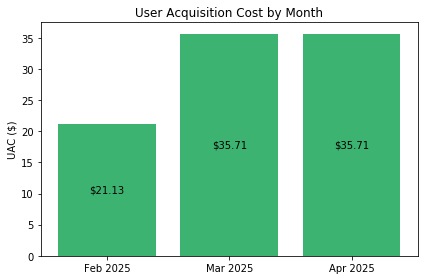

In [37]:
import matplotlib.pyplot as plt

# Example data
uac_data = {
    'Month': ['Feb 2025', 'Mar 2025', 'Apr 2025'],
    'UAC': [21.13, uac, 35.71] 
}
uac_df = pd.DataFrame(uac_data)

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(uac_df['Month'], uac_df['UAC'], color='mediumseagreen')
plt.ylabel('UAC ($)')
plt.title('User Acquisition Cost by Month')

#  value labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,     # x-position (middle of bar)
        height / 2,                            # y-position (middle of bar)
        f"${height:.2f}",                      # label text
        ha='center', va='center', fontsize=10, color='BLACK'
    )

plt.tight_layout()
plt.show()


In [38]:
# Import necessary libraries
import streamlit as st
import pandas as pd
import plotly.express as px

# Sample data (replace this with your actual data)
data = {
    'Month': ['Feb 2025', 'Mar 2025', 'Apr 2025'],
    'UAC': [21.13, 25.72, 35.71]
}
df = pd.DataFrame(data)

# Set up the Streamlit page title
st.title('User Metrics Dashboard')

# Display the DataFrame
st.subheader('Data Summary')
st.write(df)

# Create a bar chart
fig = px.bar(df, x='Month', y='UAC', title='User Acquisition Cost by Month')
st.plotly_chart(fig)

# Create a dropdown for selecting months (interactive)
month = st.selectbox('Select Month:', df['Month'].unique())
st.write(f"Displaying data for: {month}")

# Filter data based on selected month
filtered_df = df[df['Month'] == month]

# Display the filtered data
st.write(filtered_df)

# Calculate and display the average UAC for the selected month
avg_uac = filtered_df['UAC'].mean()
st.write(f"Average UAC for {month}: ${avg_uac:.2f}")
